In [30]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [31]:
phishing_dataframe = pd.read_csv('phishing_url_dataset.csv')
phishing_dataframe.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [32]:
print(f"The number of rows in the dataset : {phishing_dataframe.shape[0]} \nThe number of columns in the dataset : {phishing_dataframe.shape[1]}")

The number of rows in the dataset : 235795 
The number of columns in the dataset : 56


## Data Preprocessing

### Checking for missing values, features type exploration and feature encoding

In [33]:
# Display basic information about the dataset
phishing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [34]:
# Check for missing values
missing_values = phishing_dataframe.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore  

In [35]:
for column in phishing_dataframe.columns:
    if phishing_dataframe[column].dtype == 'object':
        le = LabelEncoder()
        phishing_dataframe[column] = le.fit_transform(phishing_dataframe[column])


In [36]:
phishing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  int64  
 1   URL                         235795 non-null  int64  
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  int64  
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  int64  
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [37]:
phishing_dataframe.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,62810,209013,31,187114,24,0,231,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,30568,223747,23,204805,16,0,254,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,79880,227579,29,209611,22,0,647,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,69962,205082,26,182115,19,0,231,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,11694,198761,33,173664,26,0,503,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [38]:
# Checking the correlation heatmap
correlation_matrix = phishing_dataframe.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Heatmap')
fig.show()

#### Outlier detection and removal

In [39]:
from scipy.stats import zscore

numerical_features = phishing_dataframe.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores of the numerical columns
z_scores = phishing_dataframe[numerical_features].apply(zscore)

# Set threshold for z-score
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).sum(axis=1) > 0
print(outliers)
# Remove outliers
phishing_dataframe = phishing_dataframe[~outliers]

0         False
1         False
2         False
3          True
4          True
          ...  
235790    False
235791    False
235792    False
235793    False
235794    False
Length: 235795, dtype: bool


## Features Selection

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming 'class' is the target variable
X = phishing_dataframe.drop('label', axis=1)
y = phishing_dataframe['label']

# Select top 10 features
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print("Selected Features:\n", selected_features)

# Create a new DataFrame with only the selected features
phishing_dataframe = phishing_dataframe[selected_features.tolist() + ['label']]


Selected Features:
 Index(['FILENAME', 'URL', 'Domain', 'LineOfCode', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfImage',
       'NoOfSelfRef', 'NoOfExternalRef'],
      dtype='object')


In [41]:
# Checking the correlation heatmap
correlation_matrix = phishing_dataframe.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Heatmap')
fig.show()

## Classification algorithms

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(phishing_dataframe[selected_features], phishing_dataframe['label'], test_size=0.2, random_state=0)

# Initialize classifiers
dt_classifier = DecisionTreeClassifier(random_state=0)
rf_classifier = RandomForestClassifier(random_state=0)

# Fit and evaluate Decision Tree before hyperparameter tuning
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Accuracy of decision tree:", accuracy_score(y_test, y_pred_dt))

# Fit and evaluate Random Forest before hyperparameter tuning
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Accuracy of random forest:", accuracy_score(y_test, y_pred_rf))

Accuracy of decision tree: 0.9996325088339223
Accuracy of random forest: 0.9999151943462897


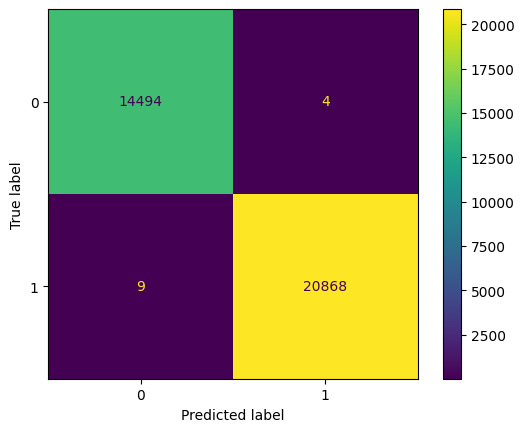

In [44]:
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_dt =  confusion_matrix(y_test, y_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [0, 1])

cm_display.plot()
plt.show()

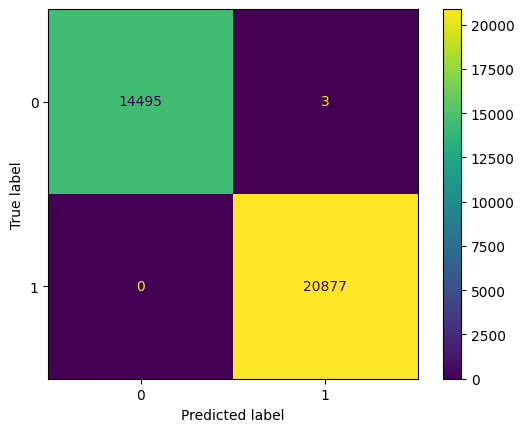

In [45]:
confusion_matrix_rf =  confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Hyperparameter Tuning

In [46]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50],
                 'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf

In [51]:
# Evaluate tuned models
y_pred_dt_tuned = best_dt.predict(X_test)
print("Accuracy of decision tree after tuning:", accuracy_score(y_test, y_pred_dt_tuned))

y_pred_rf_tuned = best_rf.predict(X_test)
print("Accuracy of random forest after tuning:", accuracy_score(y_test, y_pred_rf_tuned))

Accuracy of decision tree after tuning: 0.9991802120141343
Accuracy of random forest after tuning: 0.9994628975265017


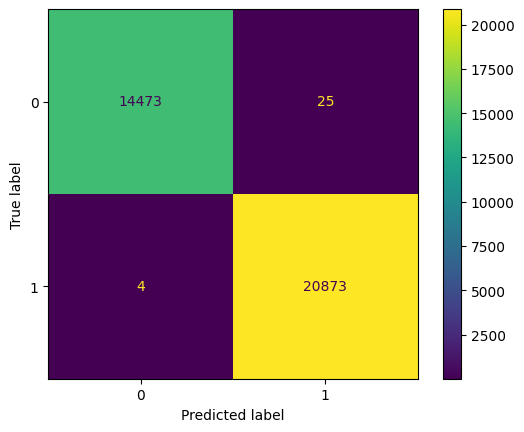

In [48]:
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_dt_tuned =  confusion_matrix(y_test, y_pred_dt_tuned)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt_tuned, display_labels = [0, 1])

cm_display.plot()
plt.show()

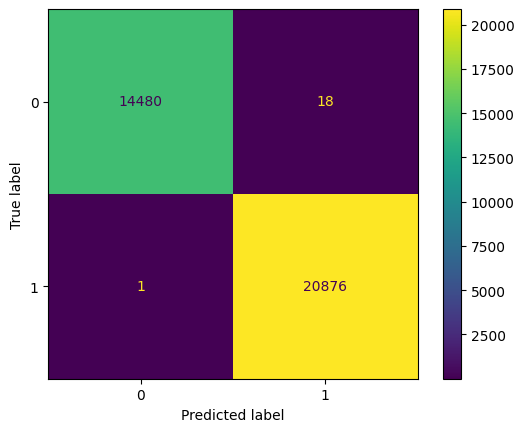

In [49]:
confusion_matrix_rf_tuned =  confusion_matrix(y_test, y_pred_rf_tuned)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf_tuned, display_labels = [0, 1])

cm_display.plot()
plt.show()